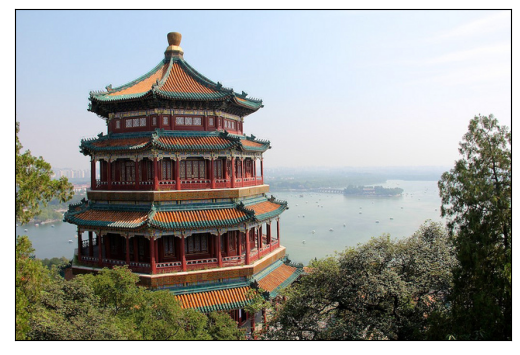

In [26]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_sample_image
china=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
im = ax.imshow(china);

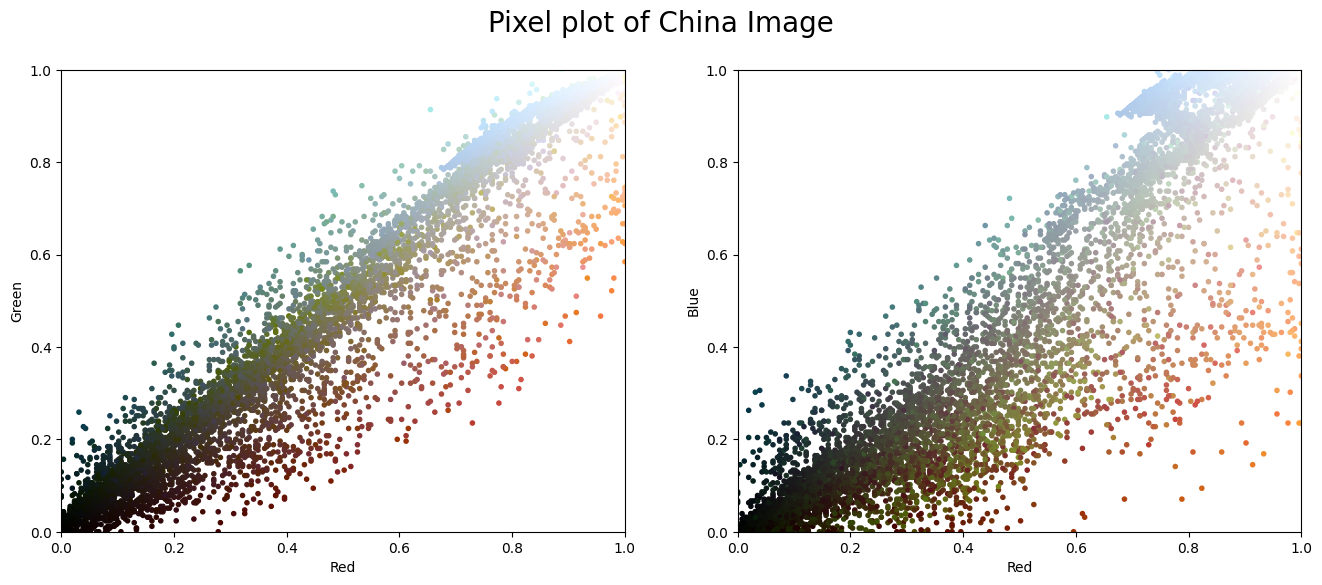

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'china' is an image represented as a numpy array

data = china / 255.0
data = data.reshape(427*640, 3)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Fixed missing comma
    ax[0].scatter(R, G, color=colors, marker='.')  # Fixed missing comma
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))  # Fixed typo
    ax[1].scatter(R, B, color=colors, marker='.')  # Fixed missing comma
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))  # Fixed typo
    plt.suptitle(title, size=20)

plot_pixels(data, "Pixel plot of China Image")  # Assuming you want to plot the data
plt.show()  # Assuming you want to display the plot


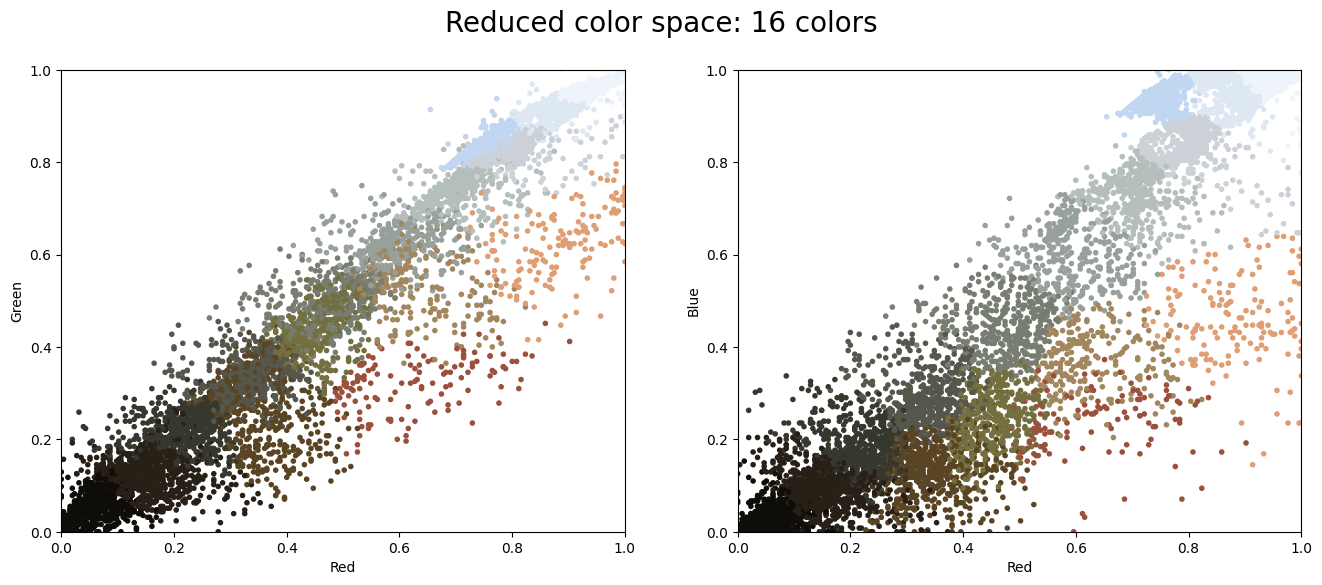

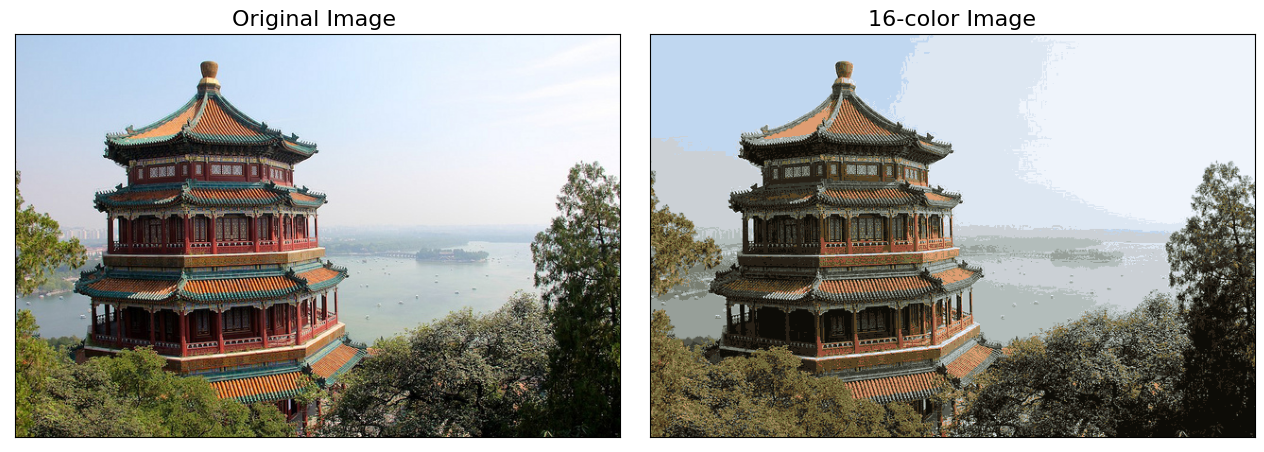

In [34]:

import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title="Reduced color space: 16 colors")
china_recolored=new_colors.reshape(china.shape)
fig, ax=plt.subplots(1,2,figsize= (16,6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image ',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16);